In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

Using TensorFlow backend.


In [2]:
TRAIN_DATA_PATH = "..\\american-sign-language-dataset\\asl" 

NUM_OF_LETTERS = 26 # "A" to "Z" 
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

LABELS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
        'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']
print(len(LABELS))

26


In [3]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir(TRAIN_DATA_PATH):
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+alphabet):
        X=imread(TRAIN_DATA_PATH+str('\\')+alphabet+str('\\')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

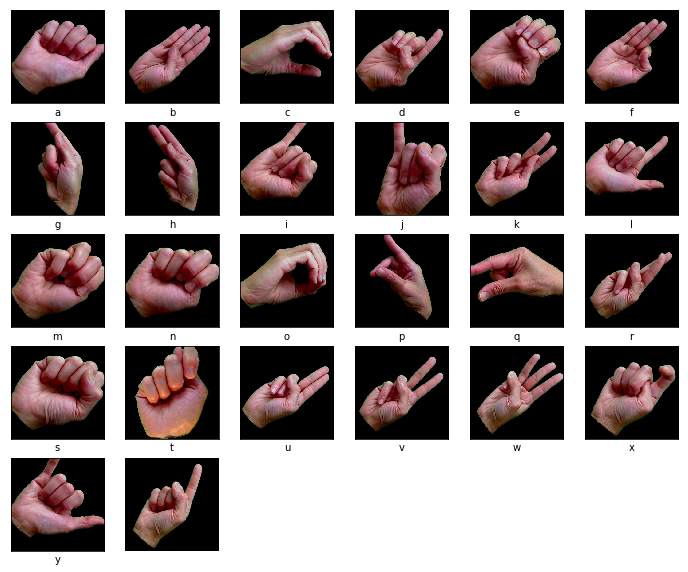

In [4]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [5]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


..\american-sign-language-dataset\asl\a\a_10_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_11_rotate_6.

..\american-sign-language-dataset\asl\a\a_23_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_23_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_23_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_23_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_23_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_24_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_25_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_25_rotate_10.

..\american-sign-language-dataset\asl\a\a_39_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_39_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_39_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_39_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_39_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_39_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_39_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_3_rotate_9.jpeg
..\ame

..\american-sign-language-dataset\asl\a\a_51_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_52_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_53_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_53_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_53_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_53_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_53_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_53_rotate_5.

..\american-sign-language-dataset\asl\a\a_67_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_67_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_67_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_67_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_67_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_67_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_1.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_10.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_2.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_3.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_4.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_5.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_6.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_7.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_8.jpeg
..\american-sign-language-dataset\asl\a\a_68_rotate_9.jpeg
..\american-sign-language-dataset\asl\a\a_69_rotate_1.j

..\american-sign-language-dataset\asl\b\b_17_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_5.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_6.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_7.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_8.jpeg
..\american-sign-language-dataset\asl\b\b_18_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_19_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_19_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_19_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_19_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_19_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_19_rotate_5.

..\american-sign-language-dataset\asl\b\b_30_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_30_rotate_5.jpeg
..\american-sign-language-dataset\asl\b\b_30_rotate_6.jpeg
..\american-sign-language-dataset\asl\b\b_30_rotate_7.jpeg
..\american-sign-language-dataset\asl\b\b_30_rotate_8.jpeg
..\american-sign-language-dataset\asl\b\b_30_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_5.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_6.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_7.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_8.jpeg
..\american-sign-language-dataset\asl\b\b_31_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_32_rotate_1.j

..\american-sign-language-dataset\asl\b\b_45_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_5.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_6.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_7.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_8.jpeg
..\american-sign-language-dataset\asl\b\b_46_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_47_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_47_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_47_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_47_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_47_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_47_rotate_5.

..\american-sign-language-dataset\asl\b\b_5_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_5.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_6.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_7.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_8.jpeg
..\american-sign-language-dataset\asl\b\b_5_rotate_9.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_1.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_10.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_2.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_3.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_4.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_5.jpeg
..\american-sign-language-dataset\asl\b\b_60_rotate_6.jpeg
..\am

..\american-sign-language-dataset\asl\b\b_9_rotate_8.jpeg
..\american-sign-language-dataset\asl\b\b_9_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_11_rotate_4.jp

..\american-sign-language-dataset\asl\c\c_26_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_26_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_26_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_26_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_26_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_27_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_28_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_28_rotate_10.

..\american-sign-language-dataset\asl\c\c_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_40_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_41_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_41_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_41_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_41_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_41_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_41_rotate_5.j

..\american-sign-language-dataset\asl\c\c_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_56_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_57_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_57_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_57_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_57_rotate_3.

..\american-sign-language-dataset\asl\c\c_70_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_70_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_70_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_70_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_70_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_70_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_70_rotate_9.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_1.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_10.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_2.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_3.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_4.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_5.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_6.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_7.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_8.jpeg
..\american-sign-language-dataset\asl\c\c_7_rotate_9.jpeg
..\ame

..\american-sign-language-dataset\asl\d\d_20_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_20_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_20_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_20_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_20_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_20_rotate_9.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_1.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_10.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_2.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_3.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_21_rotate_9.jpeg
..\american-sign-language-dataset\asl\d\d_22_rotate_1.j

..\american-sign-language-dataset\asl\d\d_33_rotate_3.jpeg
..\american-sign-language-dataset\asl\d\d_33_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_33_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_33_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_33_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_33_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_33_rotate_9.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_1.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_10.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_2.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_3.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_34_rotate_9.j

..\american-sign-language-dataset\asl\d\d_46_rotate_2.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_3.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_46_rotate_9.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_1.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_10.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_2.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_3.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_47_rotate_8.j

..\american-sign-language-dataset\asl\d\d_62_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_62_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_62_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_62_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_62_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_62_rotate_9.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_1.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_10.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_2.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_3.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_4.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_5.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_6.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_7.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_8.jpeg
..\american-sign-language-dataset\asl\d\d_63_rotate_9.jpeg
..\american-sign-language-dataset\asl\d\d_64_rotate_1.j

..\american-sign-language-dataset\asl\e\e_14_rotate_2.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_3.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_4.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_14_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_1.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_10.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_2.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_3.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_4.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_15_rotate_8.j

..\american-sign-language-dataset\asl\e\e_27_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_27_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_27_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_27_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_27_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_1.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_10.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_2.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_3.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_4.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_28_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_29_rotate_1.jpeg
..\american-sign-language-dataset\asl\e\e_29_rotate_10.

..\american-sign-language-dataset\asl\e\e_44_rotate_4.jpeg
..\american-sign-language-dataset\asl\e\e_44_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_44_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_44_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_44_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_44_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_1.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_10.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_2.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_3.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_4.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_45_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_46_rotate_1.j

..\american-sign-language-dataset\asl\e\e_5_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_5_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_5_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_5_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_5_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_1.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_10.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_2.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_3.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_4.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_5.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_6.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_7.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_8.jpeg
..\american-sign-language-dataset\asl\e\e_60_rotate_9.jpeg
..\american-sign-language-dataset\asl\e\e_61_rotate_1.jpeg
..\american-sign-language-dataset\asl\e\e_61_rotate_10.jpeg


..\american-sign-language-dataset\asl\f\f_10_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_10_rotate_5.jpeg
..\american-sign-language-dataset\asl\f\f_10_rotate_6.jpeg
..\american-sign-language-dataset\asl\f\f_10_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_10_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_5.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_6.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_11_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_12_rotate_1.j

..\american-sign-language-dataset\asl\f\f_26_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_26_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_26_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_5.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_6.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_27_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_28_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_28_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_28_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_28_rotate_3.

..\american-sign-language-dataset\asl\f\f_3_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_40_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_41_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_41_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_41_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_41_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_41_rotate_4.jp

..\american-sign-language-dataset\asl\f\f_54_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_5.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_6.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_56_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_56_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_56_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_56_rotate_5.

..\american-sign-language-dataset\asl\f\f_67_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_67_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_4.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_5.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_6.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_7.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_8.jpeg
..\american-sign-language-dataset\asl\f\f_68_rotate_9.jpeg
..\american-sign-language-dataset\asl\f\f_69_rotate_1.jpeg
..\american-sign-language-dataset\asl\f\f_69_rotate_10.jpeg
..\american-sign-language-dataset\asl\f\f_69_rotate_2.jpeg
..\american-sign-language-dataset\asl\f\f_69_rotate_3.jpeg
..\american-sign-language-dataset\asl\f\f_69_rotate_4.

..\american-sign-language-dataset\asl\g\g_20_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_6.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_7.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_8.jpeg
..\american-sign-language-dataset\asl\g\g_20_rotate_9.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_1.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_6.jpeg
..\american-sign-language-dataset\asl\g\g_21_rotate_7.

..\american-sign-language-dataset\asl\g\g_34_rotate_1.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_6.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_8.jpeg
..\american-sign-language-dataset\asl\g\g_34_rotate_9.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_1.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_35_rotate_6.

..\american-sign-language-dataset\asl\g\g_48_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_6.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_7.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_8.jpeg
..\american-sign-language-dataset\asl\g\g_48_rotate_9.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_1.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_6.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_7.jpeg
..\american-sign-language-dataset\asl\g\g_49_rotate_8.j

..\american-sign-language-dataset\asl\g\g_63_rotate_8.jpeg
..\american-sign-language-dataset\asl\g\g_63_rotate_9.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_1.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_4.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_5.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_6.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_7.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_8.jpeg
..\american-sign-language-dataset\asl\g\g_64_rotate_9.jpeg
..\american-sign-language-dataset\asl\g\g_65_rotate_1.jpeg
..\american-sign-language-dataset\asl\g\g_65_rotate_10.jpeg
..\american-sign-language-dataset\asl\g\g_65_rotate_2.jpeg
..\american-sign-language-dataset\asl\g\g_65_rotate_3.jpeg
..\american-sign-language-dataset\asl\g\g_65_rotate_4.

..\american-sign-language-dataset\asl\h\h_15_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_15_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_15_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_3.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_4.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_5.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_6.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_16_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_17_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_17_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_17_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_17_rotate_3.

..\american-sign-language-dataset\asl\h\h_2_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_2_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_2_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_3.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_4.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_5.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_6.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_30_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_31_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_31_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_31_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_31_rotate_3.jpe

..\american-sign-language-dataset\asl\h\h_46_rotate_5.jpeg
..\american-sign-language-dataset\asl\h\h_46_rotate_6.jpeg
..\american-sign-language-dataset\asl\h\h_46_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_46_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_46_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_3.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_4.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_5.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_6.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_47_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_48_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_48_rotate_10.

..\american-sign-language-dataset\asl\h\h_59_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_3.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_4.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_5.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_6.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_7.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_8.jpeg
..\american-sign-language-dataset\asl\h\h_5_rotate_9.jpeg
..\american-sign-language-dataset\asl\h\h_60_rotate_1.jpeg
..\american-sign-language-dataset\asl\h\h_60_rotate_10.jpeg
..\american-sign-language-dataset\asl\h\h_60_rotate_2.jpeg
..\american-sign-language-dataset\asl\h\h_60_rotate_3.jpeg
..\american-sign-language-dataset\asl\h\h_60_rotate_4.jpeg
..\american-sign-language-dataset\asl\h\h_60_rotate_5.jpeg
..\am

..\american-sign-language-dataset\asl\i\i_12_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_12_rotate_9.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_1.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_10.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_2.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_4.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_5.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_6.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_13_rotate_9.jpeg
..\american-sign-language-dataset\asl\i\i_14_rotate_1.jpeg
..\american-sign-language-dataset\asl\i\i_14_rotate_10.jpeg
..\american-sign-language-dataset\asl\i\i_14_rotate_2.jpeg
..\american-sign-language-dataset\asl\i\i_14_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_14_rotate_4.

..\american-sign-language-dataset\asl\i\i_29_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_29_rotate_4.jpeg
..\american-sign-language-dataset\asl\i\i_29_rotate_5.jpeg
..\american-sign-language-dataset\asl\i\i_29_rotate_6.jpeg
..\american-sign-language-dataset\asl\i\i_29_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_29_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_29_rotate_9.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_1.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_10.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_2.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_4.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_5.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_6.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_2_rotate_9.jpeg
..\ame

..\american-sign-language-dataset\asl\i\i_42_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_42_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_42_rotate_9.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_1.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_10.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_2.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_4.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_5.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_6.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_43_rotate_9.jpeg
..\american-sign-language-dataset\asl\i\i_44_rotate_1.jpeg
..\american-sign-language-dataset\asl\i\i_44_rotate_10.jpeg
..\american-sign-language-dataset\asl\i\i_44_rotate_2.jpeg
..\american-sign-language-dataset\asl\i\i_44_rotate_3.

..\american-sign-language-dataset\asl\i\i_58_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_58_rotate_4.jpeg
..\american-sign-language-dataset\asl\i\i_58_rotate_5.jpeg
..\american-sign-language-dataset\asl\i\i_58_rotate_6.jpeg
..\american-sign-language-dataset\asl\i\i_58_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_58_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_58_rotate_9.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_1.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_10.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_2.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_3.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_4.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_5.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_6.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_7.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_8.jpeg
..\american-sign-language-dataset\asl\i\i_59_rotate_9.j

..\american-sign-language-dataset\asl\i\i_9_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_10.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_2.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_4.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_5.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_6.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_7.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\j\j_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\j\j_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_11_rotate_4.jpeg
..\american-sign-language-dataset\asl\j\j_11_rotate_5.j

..\american-sign-language-dataset\asl\j\j_23_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_23_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_10.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_2.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_4.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_5.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_6.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_7.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_24_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_25_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_25_rotate_10.jpeg
..\american-sign-language-dataset\asl\j\j_25_rotate_2.jpeg
..\american-sign-language-dataset\asl\j\j_25_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_25_rotate_4.

..\american-sign-language-dataset\asl\j\j_3_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_3_rotate_4.jpeg
..\american-sign-language-dataset\asl\j\j_3_rotate_5.jpeg
..\american-sign-language-dataset\asl\j\j_3_rotate_6.jpeg
..\american-sign-language-dataset\asl\j\j_3_rotate_7.jpeg
..\american-sign-language-dataset\asl\j\j_3_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_40_rotate_9.jpeg
..\

..\american-sign-language-dataset\asl\j\j_52_rotate_5.jpeg
..\american-sign-language-dataset\asl\j\j_52_rotate_6.jpeg
..\american-sign-language-dataset\asl\j\j_52_rotate_7.jpeg
..\american-sign-language-dataset\asl\j\j_52_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_52_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_10.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_2.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_3.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_4.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_5.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_6.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_7.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_8.jpeg
..\american-sign-language-dataset\asl\j\j_53_rotate_9.jpeg
..\american-sign-language-dataset\asl\j\j_54_rotate_1.jpeg
..\american-sign-language-dataset\asl\j\j_54_rotate_10.

..\american-sign-language-dataset\asl\k\k_14_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_14_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_14_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_14_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_14_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_14_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_14_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_15_rotate_9.j

..\american-sign-language-dataset\asl\k\k_28_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_28_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_28_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_29_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_2_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_2_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_2_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_2_rotate_3.jpeg

..\american-sign-language-dataset\asl\k\k_41_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_41_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_42_rotate_8.j

..\american-sign-language-dataset\asl\k\k_54_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_54_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_54_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_56_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_56_rotate_3.

..\american-sign-language-dataset\asl\k\k_7_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_5.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_6.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_7.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_8.jpeg
..\american-sign-language-dataset\asl\k\k_8_rotate_9.jpeg
..\american-sign-language-dataset\asl\k\k_9_rotate_1.jpeg
..\american-sign-language-dataset\asl\k\k_9_rotate_10.jpeg
..\american-sign-language-dataset\asl\k\k_9_rotate_2.jpeg
..\american-sign-language-dataset\asl\k\k_9_rotate_3.jpeg
..\american-sign-language-dataset\asl\k\k_9_rotate_4.jpeg
..\american-sign-language-dataset\asl\k\k_9_rotate_5.jpeg
..\american-

..\american-sign-language-dataset\asl\l\l_21_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_5.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_6.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_7.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_8.jpeg
..\american-sign-language-dataset\asl\l\l_21_rotate_9.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_5.jpeg
..\american-sign-language-dataset\asl\l\l_22_rotate_6.

..\american-sign-language-dataset\asl\l\l_34_rotate_9.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_5.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_6.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_7.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_8.jpeg
..\american-sign-language-dataset\asl\l\l_35_rotate_9.jpeg
..\american-sign-language-dataset\asl\l\l_36_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_36_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_36_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_36_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_36_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_36_rotate_5.

..\american-sign-language-dataset\asl\l\l_47_rotate_9.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_5.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_6.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_7.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_8.jpeg
..\american-sign-language-dataset\asl\l\l_48_rotate_9.jpeg
..\american-sign-language-dataset\asl\l\l_49_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_49_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_49_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_49_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_49_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_49_rotate_5.

..\american-sign-language-dataset\asl\l\l_61_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_5.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_6.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_7.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_8.jpeg
..\american-sign-language-dataset\asl\l\l_61_rotate_9.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_1.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_10.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_2.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_3.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_4.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_5.jpeg
..\american-sign-language-dataset\asl\l\l_62_rotate_6.

..\american-sign-language-dataset\asl\m\m_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_8.jpeg
..\american-sign-language-dataset\asl\m\m_11_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_12_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_12_rotate_10.jpeg
..\american-sign-language-dataset\asl\m\m_12_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_12_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_12_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_12_rotate_5.

..\american-sign-language-dataset\asl\m\m_26_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_8.jpeg
..\american-sign-language-dataset\asl\m\m_26_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_10.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_27_rotate_8.j

..\american-sign-language-dataset\asl\m\m_3_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_8.jpeg
..\american-sign-language-dataset\asl\m\m_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_40_rotate_8.jpeg
..\a

..\american-sign-language-dataset\asl\m\m_52_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_8.jpeg
..\american-sign-language-dataset\asl\m\m_52_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_10.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_53_rotate_8.j

..\american-sign-language-dataset\asl\m\m_67_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_67_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_67_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_67_rotate_8.jpeg
..\american-sign-language-dataset\asl\m\m_67_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_10.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_2.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_3.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_4.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_5.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_6.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_7.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_8.jpeg
..\american-sign-language-dataset\asl\m\m_68_rotate_9.jpeg
..\american-sign-language-dataset\asl\m\m_69_rotate_1.jpeg
..\american-sign-language-dataset\asl\m\m_69_rotate_10.

..\american-sign-language-dataset\asl\n\n_1_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_1_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_1_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_1_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_1_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_1_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_1_rotate_9.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_20_rotate_9.jpeg
..\

..\american-sign-language-dataset\asl\n\n_33_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_33_rotate_9.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_34_rotate_8.j

..\american-sign-language-dataset\asl\n\n_46_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_46_rotate_9.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_47_rotate_9.jpeg
..\american-sign-language-dataset\asl\n\n_48_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_48_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_48_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_48_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_48_rotate_4.

..\american-sign-language-dataset\asl\n\n_59_rotate_9.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_5_rotate_9.jpeg
..\american-sign-language-dataset\asl\n\n_60_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_60_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_60_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_60_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_60_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_60_rotate_5.jpeg
..\am

..\american-sign-language-dataset\asl\n\n_9_rotate_1.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_10.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_2.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_3.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_4.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_5.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_6.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_7.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_8.jpeg
..\american-sign-language-dataset\asl\n\n_9_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_10_rotate_6.jpeg
..\am

..\american-sign-language-dataset\asl\o\o_25_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_6.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_7.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_8.jpeg
..\american-sign-language-dataset\asl\o\o_25_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_26_rotate_6.

..\american-sign-language-dataset\asl\o\o_3_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_3_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_3_rotate_6.jpeg
..\american-sign-language-dataset\asl\o\o_3_rotate_7.jpeg
..\american-sign-language-dataset\asl\o\o_3_rotate_8.jpeg
..\american-sign-language-dataset\asl\o\o_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_8.jpeg
..\american-sign-language-dataset\asl\o\o_40_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_41_rotate_1.jpeg
..

..\american-sign-language-dataset\asl\o\o_55_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_6.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\o\o_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_56_rotate_6.

..\american-sign-language-dataset\asl\o\o_70_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_70_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_70_rotate_6.jpeg
..\american-sign-language-dataset\asl\o\o_70_rotate_7.jpeg
..\american-sign-language-dataset\asl\o\o_70_rotate_8.jpeg
..\american-sign-language-dataset\asl\o\o_70_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_1.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_10.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_2.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_3.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_4.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_5.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_6.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_7.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_8.jpeg
..\american-sign-language-dataset\asl\o\o_7_rotate_9.jpeg
..\american-sign-language-dataset\asl\o\o_8_rotate_1.jpeg
..\amer

..\american-sign-language-dataset\asl\p\p_23_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_23_rotate_8.jpeg
..\american-sign-language-dataset\asl\p\p_23_rotate_9.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_3.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_4.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_5.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_6.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_8.jpeg
..\american-sign-language-dataset\asl\p\p_24_rotate_9.jpeg
..\american-sign-language-dataset\asl\p\p_25_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_25_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_25_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_25_rotate_3.

..\american-sign-language-dataset\asl\p\p_3_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_3.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_4.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_5.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_6.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_8.jpeg
..\american-sign-language-dataset\asl\p\p_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\p\p_40_rotate_6.jpeg
..\am

..\american-sign-language-dataset\asl\p\p_54_rotate_6.jpeg
..\american-sign-language-dataset\asl\p\p_54_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_54_rotate_8.jpeg
..\american-sign-language-dataset\asl\p\p_54_rotate_9.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_3.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_4.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_5.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_6.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\p\p_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\p\p_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_56_rotate_2.

..\american-sign-language-dataset\asl\p\p_68_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_3.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_4.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_5.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_6.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_8.jpeg
..\american-sign-language-dataset\asl\p\p_68_rotate_9.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_1.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_10.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_2.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_3.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_4.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_5.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_6.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_7.jpeg
..\american-sign-language-dataset\asl\p\p_69_rotate_8.j

..\american-sign-language-dataset\asl\q\q_19_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_19_rotate_4.jpeg
..\american-sign-language-dataset\asl\q\q_19_rotate_5.jpeg
..\american-sign-language-dataset\asl\q\q_19_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_19_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_19_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_19_rotate_9.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_1.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_10.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_2.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_4.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_5.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_1_rotate_9.jpeg
..\ame

..\american-sign-language-dataset\asl\q\q_33_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_33_rotate_9.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_1.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_10.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_2.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_4.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_5.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_34_rotate_9.jpeg
..\american-sign-language-dataset\asl\q\q_35_rotate_1.jpeg
..\american-sign-language-dataset\asl\q\q_35_rotate_10.jpeg
..\american-sign-language-dataset\asl\q\q_35_rotate_2.jpeg
..\american-sign-language-dataset\asl\q\q_35_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_35_rotate_4.

..\american-sign-language-dataset\asl\q\q_49_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_49_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_49_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_49_rotate_9.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_1.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_10.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_2.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_4.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_5.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_4_rotate_9.jpeg
..\american-sign-language-dataset\asl\q\q_50_rotate_1.jpeg
..\american-sign-language-dataset\asl\q\q_50_rotate_10.jpeg
..\american-sign-language-dataset\asl\q\q_50_rotate_2.jpeg
..\am

..\american-sign-language-dataset\asl\q\q_64_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_64_rotate_4.jpeg
..\american-sign-language-dataset\asl\q\q_64_rotate_5.jpeg
..\american-sign-language-dataset\asl\q\q_64_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_64_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_64_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_64_rotate_9.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_1.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_10.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_2.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_3.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_4.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_5.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_6.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_7.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_8.jpeg
..\american-sign-language-dataset\asl\q\q_65_rotate_9.j

..\american-sign-language-dataset\asl\r\r_16_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_16_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_1.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_17_rotate_7.

..\american-sign-language-dataset\asl\r\r_31_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_31_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_1.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_32_rotate_7.

..\american-sign-language-dataset\asl\r\r_45_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_45_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_45_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_45_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_45_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_45_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_1.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_46_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_47_rotate_1.j

..\american-sign-language-dataset\asl\r\r_58_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_58_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_58_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_1.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_59_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_5_rotate_1.jpeg
..\american-sign-language-dataset\asl\r\r_5_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_5_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_5_rotate_3.jpeg

..\american-sign-language-dataset\asl\r\r_7_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_8.jpeg
..\american-sign-language-dataset\asl\r\r_7_rotate_9.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_1.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_10.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_2.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_3.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_4.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_5.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_6.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_7.jpeg
..\american-sign-language-dataset\asl\r\r_8_rotate_8.jpeg
..\american-s

..\american-sign-language-dataset\asl\s\s_20_rotate_5.jpeg
..\american-sign-language-dataset\asl\s\s_20_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_20_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_20_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_20_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_2.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_3.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_4.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_5.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_21_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_22_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_22_rotate_10.

..\american-sign-language-dataset\asl\s\s_37_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_37_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_37_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_37_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_2.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_3.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_4.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_5.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_38_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_39_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_39_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_39_rotate_2.

..\american-sign-language-dataset\asl\s\s_4_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_4_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_4_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_4_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_2.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_3.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_4.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_5.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_50_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_51_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_51_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_51_rotate_2.jpeg

..\american-sign-language-dataset\asl\s\s_64_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_2.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_3.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_4.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_5.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_6.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_7.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_8.jpeg
..\american-sign-language-dataset\asl\s\s_64_rotate_9.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_1.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_10.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_2.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_3.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_4.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_5.jpeg
..\american-sign-language-dataset\asl\s\s_65_rotate_6.

..\american-sign-language-dataset\asl\t\t_10_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_5.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_6.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_7.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_8.jpeg
..\american-sign-language-dataset\asl\t\t_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_5.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_6.jpeg
..\american-sign-language-dataset\asl\t\t_11_rotate_7.

..\american-sign-language-dataset\asl\t\t_24_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_5.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_6.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_7.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_8.jpeg
..\american-sign-language-dataset\asl\t\t_24_rotate_9.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_5.jpeg
..\american-sign-language-dataset\asl\t\t_25_rotate_6.

..\american-sign-language-dataset\asl\t\t_3_rotate_9.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_8.jpeg
..\american-sign-language-dataset\asl\t\t_40_rotate_9.jpeg
..\american-sign-language-dataset\asl\t\t_41_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_41_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_41_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_41_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_41_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_41_rotate_5.j

..\american-sign-language-dataset\asl\t\t_56_rotate_9.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_5.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_6.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_7.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_8.jpeg
..\american-sign-language-dataset\asl\t\t_57_rotate_9.jpeg
..\american-sign-language-dataset\asl\t\t_58_rotate_1.jpeg
..\american-sign-language-dataset\asl\t\t_58_rotate_10.jpeg
..\american-sign-language-dataset\asl\t\t_58_rotate_2.jpeg
..\american-sign-language-dataset\asl\t\t_58_rotate_3.jpeg
..\american-sign-language-dataset\asl\t\t_58_rotate_4.jpeg
..\american-sign-language-dataset\asl\t\t_58_rotate_5.

..\american-sign-language-dataset\asl\u\u_10_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_5.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_6.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_11_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_12_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_12_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_12_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_12_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_12_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_12_rotate_5.

..\american-sign-language-dataset\asl\u\u_24_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_5.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_6.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_25_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_26_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_26_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_26_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_26_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_26_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_26_rotate_5.

..\american-sign-language-dataset\asl\u\u_41_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_41_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_41_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_5.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_6.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_42_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_43_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_43_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_43_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_43_rotate_3.

..\american-sign-language-dataset\asl\u\u_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_5.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_6.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_56_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_57_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_57_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_57_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_57_rotate_3.

..\american-sign-language-dataset\asl\u\u_68_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_5.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_6.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_7.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_8.jpeg
..\american-sign-language-dataset\asl\u\u_69_rotate_9.jpeg
..\american-sign-language-dataset\asl\u\u_6_rotate_1.jpeg
..\american-sign-language-dataset\asl\u\u_6_rotate_10.jpeg
..\american-sign-language-dataset\asl\u\u_6_rotate_2.jpeg
..\american-sign-language-dataset\asl\u\u_6_rotate_3.jpeg
..\american-sign-language-dataset\asl\u\u_6_rotate_4.jpeg
..\american-sign-language-dataset\asl\u\u_6_rotate_5.jpeg
.

..\american-sign-language-dataset\asl\v\v_1_rotate_10.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_2.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_7.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_8.jpeg
..\american-sign-language-dataset\asl\v\v_1_rotate_9.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_1.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_10.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_2.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_20_rotate_7.jpeg
..\a

..\american-sign-language-dataset\asl\v\v_33_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_33_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_33_rotate_7.jpeg
..\american-sign-language-dataset\asl\v\v_33_rotate_8.jpeg
..\american-sign-language-dataset\asl\v\v_33_rotate_9.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_1.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_10.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_2.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_8.jpeg
..\american-sign-language-dataset\asl\v\v_34_rotate_9.jpeg
..\american-sign-language-dataset\asl\v\v_35_rotate_1.jpeg
..\american-sign-language-dataset\asl\v\v_35_rotate_10.

..\american-sign-language-dataset\asl\v\v_47_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_47_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_47_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_47_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_47_rotate_7.jpeg
..\american-sign-language-dataset\asl\v\v_47_rotate_8.jpeg
..\american-sign-language-dataset\asl\v\v_47_rotate_9.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_1.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_10.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_2.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_7.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_8.jpeg
..\american-sign-language-dataset\asl\v\v_48_rotate_9.j

..\american-sign-language-dataset\asl\v\v_5_rotate_9.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_1.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_10.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_2.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_5.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_6.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_7.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_8.jpeg
..\american-sign-language-dataset\asl\v\v_60_rotate_9.jpeg
..\american-sign-language-dataset\asl\v\v_61_rotate_1.jpeg
..\american-sign-language-dataset\asl\v\v_61_rotate_10.jpeg
..\american-sign-language-dataset\asl\v\v_61_rotate_2.jpeg
..\american-sign-language-dataset\asl\v\v_61_rotate_3.jpeg
..\american-sign-language-dataset\asl\v\v_61_rotate_4.jpeg
..\american-sign-language-dataset\asl\v\v_61_rotate_5.j

..\american-sign-language-dataset\asl\w\w_13_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_13_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_14_rotate_6.

..\american-sign-language-dataset\asl\w\w_26_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_26_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_26_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_27_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_28_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_28_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_28_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_28_rotate_3.

..\american-sign-language-dataset\asl\w\w_40_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_40_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_41_rotate_7.

..\american-sign-language-dataset\asl\w\w_54_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_55_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_56_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_56_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_56_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_56_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_56_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_56_rotate_5.

..\american-sign-language-dataset\asl\w\w_70_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_70_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_70_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_70_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_70_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_70_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_70_rotate_9.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_1.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_10.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_2.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_3.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_4.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_5.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_6.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_7.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_8.jpeg
..\american-sign-language-dataset\asl\w\w_7_rotate_9.jpeg
..\ame

..\american-sign-language-dataset\asl\x\x_20_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_20_rotate_8.jpeg
..\american-sign-language-dataset\asl\x\x_20_rotate_9.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_1.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_10.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_3.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_8.jpeg
..\american-sign-language-dataset\asl\x\x_21_rotate_9.jpeg
..\american-sign-language-dataset\asl\x\x_22_rotate_1.jpeg
..\american-sign-language-dataset\asl\x\x_22_rotate_10.jpeg
..\american-sign-language-dataset\asl\x\x_22_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_22_rotate_3.

..\american-sign-language-dataset\asl\x\x_34_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_34_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_34_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_34_rotate_8.jpeg
..\american-sign-language-dataset\asl\x\x_34_rotate_9.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_1.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_10.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_3.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_8.jpeg
..\american-sign-language-dataset\asl\x\x_35_rotate_9.jpeg
..\american-sign-language-dataset\asl\x\x_36_rotate_1.j

..\american-sign-language-dataset\asl\x\x_4_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_3.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_8.jpeg
..\american-sign-language-dataset\asl\x\x_4_rotate_9.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_1.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_10.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_3.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_50_rotate_8.jpeg
..\a

..\american-sign-language-dataset\asl\x\x_65_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_3.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_8.jpeg
..\american-sign-language-dataset\asl\x\x_65_rotate_9.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_1.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_10.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_2.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_3.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_4.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_5.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_6.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_7.jpeg
..\american-sign-language-dataset\asl\x\x_66_rotate_8.j

..\american-sign-language-dataset\asl\y\y_18_rotate_4.jpeg
..\american-sign-language-dataset\asl\y\y_18_rotate_5.jpeg
..\american-sign-language-dataset\asl\y\y_18_rotate_6.jpeg
..\american-sign-language-dataset\asl\y\y_18_rotate_7.jpeg
..\american-sign-language-dataset\asl\y\y_18_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_18_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_3.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_4.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_5.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_6.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_7.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_19_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_1_rotate_1.jp

..\american-sign-language-dataset\asl\y\y_34_rotate_7.jpeg
..\american-sign-language-dataset\asl\y\y_34_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_34_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_3.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_4.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_5.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_6.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_7.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_35_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_36_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_36_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_36_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_36_rotate_3.

..\american-sign-language-dataset\asl\y\y_4_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_3.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_4.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_5.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_6.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_7.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_50_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_51_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_51_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_51_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_51_rotate_3.jpeg
..\american-sign-language-dataset\asl\y\y_51_rotate_4.jpeg
..\american-sign-language-dataset\asl\y\y_51_rotate_5.j

..\american-sign-language-dataset\asl\y\y_62_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_62_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_3.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_4.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_5.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_6.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_7.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_8.jpeg
..\american-sign-language-dataset\asl\y\y_63_rotate_9.jpeg
..\american-sign-language-dataset\asl\y\y_64_rotate_1.jpeg
..\american-sign-language-dataset\asl\y\y_64_rotate_10.jpeg
..\american-sign-language-dataset\asl\y\y_64_rotate_2.jpeg
..\american-sign-language-dataset\asl\y\y_64_rotate_3.jpeg
..\american-sign-language-dataset\asl\y\y_64_rotate_4.

..\american-sign-language-dataset\asl\z\z_16_rotate_3.jpeg
..\american-sign-language-dataset\asl\z\z_16_rotate_4.jpeg
..\american-sign-language-dataset\asl\z\z_16_rotate_5.jpeg
..\american-sign-language-dataset\asl\z\z_16_rotate_6.jpeg
..\american-sign-language-dataset\asl\z\z_16_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_16_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_16_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_3.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_4.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_5.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_6.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_17_rotate_9.j

..\american-sign-language-dataset\asl\z\z_31_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_31_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_31_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_3.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_4.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_5.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_6.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_32_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_33_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_33_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_33_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_33_rotate_3.

..\american-sign-language-dataset\asl\z\z_44_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_44_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_44_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_3.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_4.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_5.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_6.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_45_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_46_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_46_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_46_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_46_rotate_3.

..\american-sign-language-dataset\asl\z\z_61_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_3.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_4.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_5.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_6.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_7.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_8.jpeg
..\american-sign-language-dataset\asl\z\z_62_rotate_9.jpeg
..\american-sign-language-dataset\asl\z\z_63_rotate_1.jpeg
..\american-sign-language-dataset\asl\z\z_63_rotate_10.jpeg
..\american-sign-language-dataset\asl\z\z_63_rotate_2.jpeg
..\american-sign-language-dataset\asl\z\z_63_rotate_3.jpeg
..\american-sign-language-dataset\asl\z\z_63_rotate_4.jpeg
..\american-sign-language-dataset\asl\z\z_63_rotate_5.

In [6]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

18200


In [7]:
X_train=np.array(X_train)

In [8]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(18200, 50, 50, 1)


In [9]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [10]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(18200, 50, 50, 1)


In [11]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [3]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [4]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = "softmax"))

# Compiling CNN Model

In [5]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 50)        500       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 50)        22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 100)       45100     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 100)       90100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 100)       0         
__________

# Training Model

In [7]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 52,
    epochs = 5,
    shuffle = True
)

Epoch 1/5
18200/18200 [==============================] - 1049s 58ms/step - loss: 0.6648 - acc: 0.7847
Epoch 2/5
18200/18200 [==============================] - 825s 45ms/step - loss: 0.0995 - acc: 0.9673
Epoch 3/5
18200/18200 [==============================] - 822s 45ms/step - loss: 0.0595 - acc: 0.9794
Epoch 4/5
18200/18200 [==============================] - 821s 45ms/step - loss: 0.0376 - acc: 0.9866
Epoch 5/5
18200/18200 [==============================] - 818s 45ms/step - loss: 0.0387 - acc: 0.9875


# Saving Model for future use

In [8]:
#Saving Model
from keras.models import load_model
model.save('model.h5') 